##### 5. Model Selection & Model Training

In [11]:
# import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

In [12]:
# load the data
df = pd.read_csv('data/seeds_dataset.csv')
LABEL_MAP = {
    1: "Kama",
    2: "Rosa",
    3: "Canadian",
}
# Convert class labels into text
df["Class (1, 2, 3)"] = df["Class (1, 2, 3)"].map(LABEL_MAP)


In [13]:
#droping the unwanted columns
df.drop(['Unnamed: 8','Unnamed: 9'],axis=1,inplace=True)

In [14]:
# separate the features and target variable
X = df.drop('Class (1, 2, 3)', axis=1)
y = df['Class (1, 2, 3)']

In [15]:
# Normalize and Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)


# Print the normalized and scaled data
print("Normalized data: \n", X)


Normalized data: 
 [[0.44098206 0.50206612 0.5707804  ... 0.48610121 0.18930164 0.34515017]
 [0.40509915 0.44628099 0.66243194 ... 0.50106914 0.03288302 0.21516494]
 [0.34938621 0.34710744 0.87931034 ... 0.50392017 0.25145302 0.1506647 ]
 ...
 [0.24645892 0.25826446 0.7277677  ... 0.42908054 0.98166664 0.26440177]
 [0.11803588 0.16528926 0.39927405 ... 0.14682823 0.36834441 0.25849335]
 [0.16147309 0.19214876 0.54718693 ... 0.24518888 0.63346292 0.26784835]]


In [16]:
# Split the dataset into features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models
models = [ LogisticRegression(solver='liblinear', penalty='l1', max_iter=100),
           GradientBoostingClassifier(n_estimators=100,random_state=5,learning_rate=0.1),
           SVC(kernel='rbf', C=2, gamma=1.0),
           BaggingClassifier(n_estimators=100,random_state=5),
           GaussianNB(),
           RandomForestClassifier(n_estimators=100, random_state=5,max_depth=5,criterion = 'entropy'),
           KNeighborsClassifier(n_neighbors=10),
           AdaBoostClassifier(n_estimators=100,random_state=5,),
           LGBMClassifier(n_estimators=100,random_state=5), 
           CatBoostClassifier(n_estimators=100,random_state=5),
           ExtraTreesClassifier(n_estimators=100,random_state=5)]

# Define a list of model names
model_names = ["LogisticRegression", "GaussianNB", "DecisionTree", "RandomForest", "GradientBoosting", "SVM",
               "KNN", "AdaBoost", "LightGBM", "CatBoost", "Bagging", "ExtraTrees"]

# Iterate over the models
for model, model_name in zip(models, model_names):
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    

c:\Users\HP\Downloads\WheatKernel\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Learning rate set to 0.5
0:	learn: 0.6939646	total: 10.8ms	remaining: 1.06s
1:	learn: 0.4774933	total: 14ms	remaining: 684ms
2:	learn: 0.3946588	total: 23.5ms	remaining: 759ms
3:	learn: 0.3319374	total: 26.2ms	remaining: 630ms
4:	learn: 0.2745760	total: 30.2ms	remaining: 573ms
5:	learn: 0.2434827	total: 39ms	remaining: 611ms
6:	learn: 0.2182787	total: 41.6ms	remaining: 553ms
7:	learn: 0.1998170	total: 44.6ms	remaining: 513ms
8:	learn: 0.1830054	total: 48.5ms	remaining: 491ms
9:	learn: 0.1644992	total: 54.3ms	remaining: 489ms
10:	learn: 0.1580069	total: 57.1ms	remaining: 462ms
11:	learn: 0.1482158	total: 59.1ms	remaining: 434ms
12:	learn: 0.1390966	total: 61ms	remaining: 408ms
13:	learn: 0.1328039	total: 66.6ms	remaining: 409ms
14:	learn: 0.1252399	total: 70.5ms	remaining: 400ms
15:	learn: 0.1155078	total: 73.1ms	remaining: 384ms
16:	learn: 0.1132030	total: 74.9ms	remaining: 366ms
17:	learn: 0.1046242	total: 81.2ms	remaining: 370ms
18:	learn: 0.0945958	total: 89.7ms	remaining: 383ms
19:

In [17]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((168, 7), (42, 7))

In [18]:
results = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    result = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    results.append(result)

zip_file = zip(models, results)


for model, result in zip(models, results):
        y_pred = model.predict(X_test)
        np.seterr(divide='ignore', invalid='ignore')
        precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        print(f'{model.__class__.__name__} - precision: {precision:.2f}, recall: {recall:.2f}, fscore: {fscore:.2f}')

c:\Users\HP\Downloads\WheatKernel\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\Downloads\WheatKernel\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression - precision: 0.98, recall: 0.98, fscore: 0.98
GradientBoostingClassifier - precision: 0.94, recall: 0.93, fscore: 0.93
SVC - precision: 0.91, recall: 0.90, fscore: 0.91
BaggingClassifier - precision: 0.91, recall: 0.90, fscore: 0.91
GaussianNB - precision: 0.86, recall: 0.86, fscore: 0.86
RandomForestClassifier - precision: 0.91, recall: 0.90, fscore: 0.91
KNeighborsClassifier - precision: 0.93, recall: 0.93, fscore: 0.93
AdaBoostClassifier - precision: 0.44, recall: 0.60, fscore: 0.48
LGBMClassifier - precision: 0.91, recall: 0.90, fscore: 0.91
CatBoostClassifier - precision: 0.93, recall: 0.93, fscore: 0.93
ExtraTreesClassifier - precision: 0.88, recall: 0.88, fscore: 0.88


c:\Users\HP\Downloads\WheatKernel\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HP\Downloads\WheatKernel\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning rate set to 0.5
0:	learn: 0.6939646	total: 2.44ms	remaining: 242ms
1:	learn: 0.4774933	total: 4.26ms	remaining: 209ms
2:	learn: 0.3946588	total: 6.14ms	remaining: 198ms
3:	learn: 0.3319374	total: 10.1ms	remaining: 242ms
4:	learn: 0.2745760	total: 12ms	remaining: 228ms
5:	learn: 0.2434827	total: 13.8ms	remaining: 217ms
6:	learn: 0.2182787	total: 15.6ms	remaining: 208ms
7:	learn: 0.1998170	total: 17.5ms	remaining: 201ms
8:	learn: 0.1830054	total: 19.3ms	remaining: 195ms
9:	learn: 0.1644992	total: 21.9ms	remaining: 197ms
10:	learn: 0.1580069	total: 25.7ms	remaining: 208ms
11:	learn: 0.1482158	total: 28.3ms	remaining: 207ms
12:	learn: 0.1390966	total: 30.1ms	remaining: 201ms
13:	learn: 0.1328039	total: 32.1ms	remaining: 197ms
14:	learn: 0.1252399	total: 34ms	remaining: 193ms
15:	learn: 0.1155078	total: 36ms	remaining: 189ms
16:	learn: 0.1132030	total: 38ms	remaining: 185ms
17:	learn: 0.1046242	total: 42.4ms	remaining: 193ms
18:	learn: 0.0945958	total: 44.8ms	remaining: 191ms
19:	l

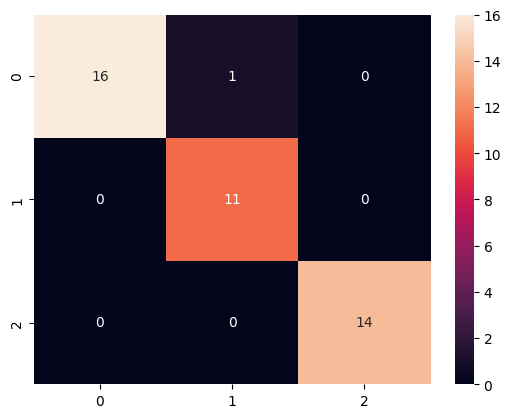

In [19]:
# Initialize variables to store precision and model name
highest_precision = 0
best_model_name = ''

# Iterate over the models
for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    if precision > highest_precision:
        highest_precision = precision
        best_model_name = model_name
        best_model = model

# create a confusion matrix for the best model
cm = confusion_matrix(y_test, best_model.predict(X_test))
print(f'{best_model_name} - confusion matrix:')
print(cm)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()


##### making a Predictive System


In [20]:
input_data=(14.99,14.56,0.8883,5.57,3.377,2.958,5.175)
input_data_as_numpy_array =np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction =model.predict(input_data_reshaped)
if(prediction==1):
    print('class 1')
elif(prediction==2):
    print('class 2')
else:
    print('class 3')      

class 3


c:\Users\HP\Downloads\WheatKernel\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
